In [1]:
import embera
import minorminer
import networkx as nx
import dwave_networkx as dnx
import matplotlib.pyplot as plt

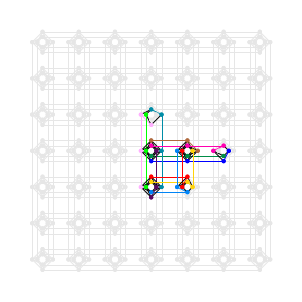

In [2]:
S = nx.complete_graph(11)
################################################################################
T = dnx.chimera_graph(7)
embedding = minorminer.find_embedding(S,T)
_ = plt.figure(figsize=(4,4))
dnx.draw_chimera_embedding(T,embedding,node_size=10)

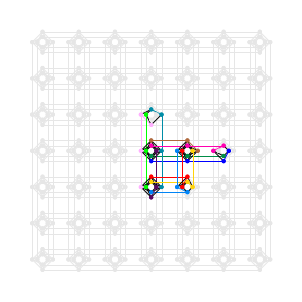

In [3]:
################################################################################
origin = (2,3)
tra_embedding = embera.transform.embedding.translate(T,embedding,origin)
_ = plt.figure(figsize=(4,4))
dnx.draw_chimera_embedding(T,tra_embedding,node_size=10)

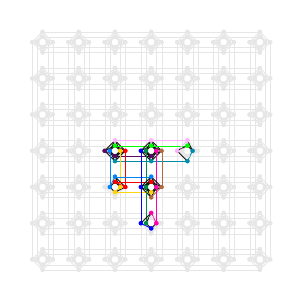

In [4]:
################################################################################
rot_embedding = embera.transform.embedding.rotate(T,embedding)
_ = plt.figure(figsize=(4,4))
dnx.draw_chimera_embedding(T,rot_embedding,node_size=10)



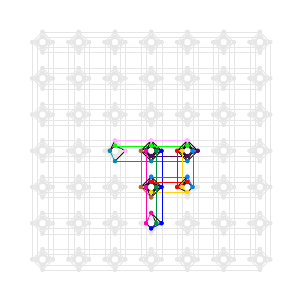

In [5]:
################################################################################
mir_embedding = embera.transform.embedding.mirror(T,rot_embedding,0)
_ = plt.figure(figsize=(4,4))
dnx.draw_chimera_embedding(T,mir_embedding,node_size=10)


In [6]:

################################################################################
class PegasusConverter():

    frag = None
    defrag = None
    busgraph = None

    chimera_graph = None
    pegasus_graph = None

    chimera_coordinates = None
    pegasus_coordinates = None

    labels = None

    def __init__(self, P):

        self.frag = dnx.generators.pegasus.get_tuple_fragmentation_fn(P)
        self.defrag = dnx.generators.pegasus.get_tuple_defragmentation_fn(P)

        self.pegasus_coordinates = dnx.generators.pegasus_coordinates(P.graph['rows'])
        self.pegasus_graph = self.pegasus_coordinates.graph_to_linear(P)

        self.busgraph = minorminer.busclique.busgraph_cache(self.pegasus_graph)
        m, n, t, nodes, edges = self.busgraph._graph.fragment_graph_spec()

        self.chimera_coordinates = dnx.generators.chimera_coordinates(m,n,t)
        self.chimera_graph = dnx.chimera_graph(m,n=n,t=t,node_list=nodes,edge_list=edges)

    def embedding_to_chimera(self,embedding):
        to_node = self.busgraph._graph.fragment_nodes
        delabel = self.busgraph._graph.delabel
        return {k : to_node(c) for k, c in embedding.items()}

    def embedding_from_chimera(self,embedding):
        coord = {k:self.chimera_coordinates.iter_linear_to_chimera(chain)
                 for k,chain in embedding.items()}
        coord_emb = {k:self.defrag(chain) for k,chain in coord.items()}
        peg_emb = {k:self.pegasus_coordinates.iter_pegasus_to_linear(chain)
                for k,chain in coord_emb.items()}
        return peg_emb


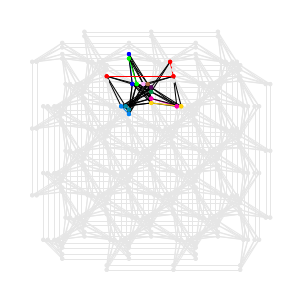

In [7]:

################################################################################
P4 = dnx.pegasus_graph(4)
Pembedding = minorminer.find_embedding(S,P4,random_seed=42)
_ = plt.figure(figsize=(4,4))
dnx.draw_pegasus_embedding(P4,Pembedding,node_size=10)



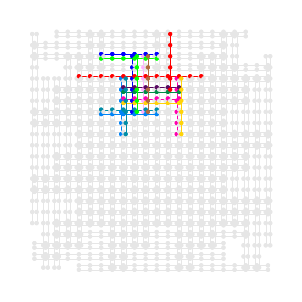

In [8]:
################################################################################
converter = PegasusConverter(P4)
C = converter.chimera_graph
Cembedding = converter.embedding_to_chimera(Pembedding)
_ = plt.figure(figsize=(4,4))
dnx.draw_chimera_embedding(C,Cembedding,node_size=10)



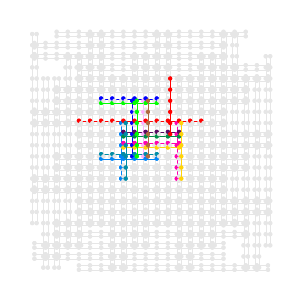

In [9]:
################################################################################
origin = (5,5)
Ctra_embedding = embera.transform.embedding.translate(C,Cembedding,origin)
_ = plt.figure(figsize=(4,4))
dnx.draw_chimera_embedding(C,Ctra_embedding,node_size=10)



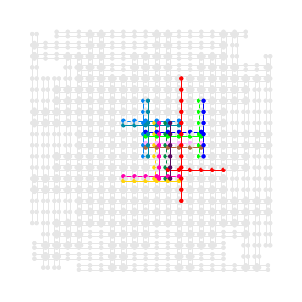

In [10]:
################################################################################
Crot_embedding = embera.transform.embedding.rotate(C,Ctra_embedding)
_ = plt.figure(figsize=(4,4))
dnx.draw_chimera_embedding(C,Crot_embedding,node_size=10)



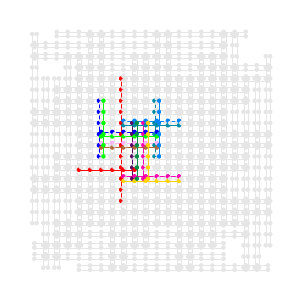

In [11]:
################################################################################
Cmir_embedding = embera.transform.embedding.mirror(C,Crot_embedding,0)
_ = plt.figure(figsize=(4,4))
dnx.draw_chimera_embedding(C,Cmir_embedding,node_size=10)



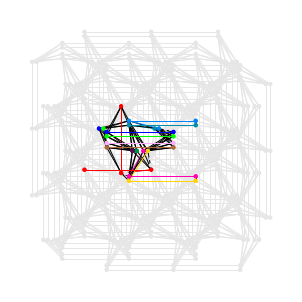

In [12]:
################################################################################
Pmir_embedding = converter.embedding_from_chimera(Cmir_embedding)
_ = plt.figure(figsize=(4,4))
dnx.draw_pegasus_embedding(P4,Pmir_embedding,node_size=10)
